<a href="https://colab.research.google.com/github/Carlys222/UNIDAD-2/blob/main/practica_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-2/refs/heads/main/smart_logistics_dataset.csv')
df.dropna(inplace = True)
df

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


# a) Selecciona una variable dependiente, elimina valores nulos y realiza el encoding.

Variable dependeiente es Inventory_Level
---





In [268]:
df.drop(columns = ["Timestamp"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [269]:
df['Asset_ID'].unique()

array(['Truck_6', 'Truck_9', 'Truck_2', 'Truck_10', 'Truck_8', 'Truck_3',
       'Truck_5', 'Truck_4', 'Truck_1', 'Truck_7'], dtype=object)

In [270]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'Inventory_Level ~ C(Asset_ID)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

# H0: NO HAY DIFERENCIA SIGNIFICATIVA ENTRE GRUPOS NO RECHAZAMOS H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,1.640473e+05,18227.477875,1.394315,0.18649
Residual,727.0,9.503862e+06,13072.713042,NaN,NaN


In [271]:
df.drop(columns = ["Asset_ID"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


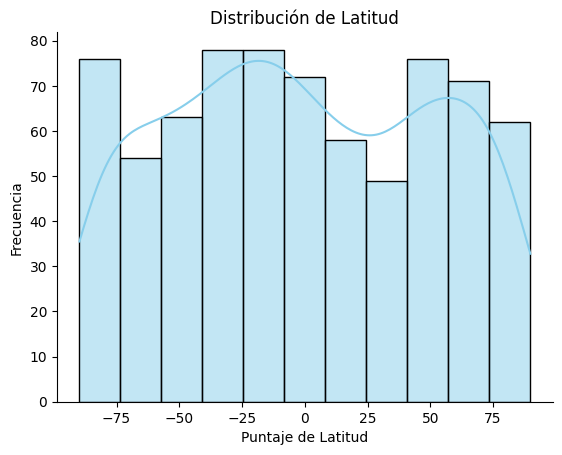

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'skyblue')

plt.xlabel('Puntaje de Latitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Latitud')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipocos

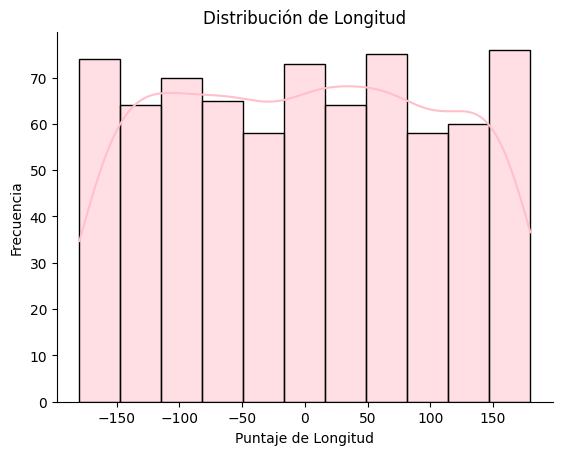

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'pink')

plt.xlabel('Puntaje de Longitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

In [274]:
df['Shipment_Status'].unique()

array(['In Transit', 'Delivered', 'Delayed'], dtype=object)

In [275]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'Inventory_Level ~ C(Shipment_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

# H0: NO HAY DIFERENCIA SIGNIFICATIVA ENTRE GRUPOS NO SE RECHAZA H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,7.794063e+04,38970.314549,2.982722,0.051269
Residual,734.0,9.589969e+06,13065.352934,NaN,NaN


In [276]:
df.drop(columns = ["Shipment_Status"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


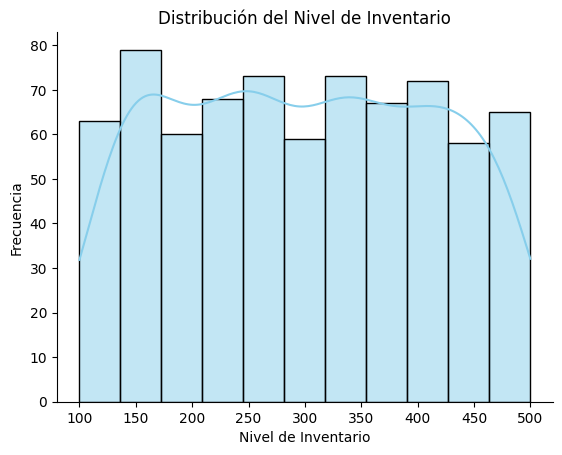

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'skyblue')

plt.xlabel('Nivel de Inventario')
plt.ylabel('Frecuencia')
plt.title('Distribución del Nivel de Inventario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


# NO HAY DATOS ATIPICOS

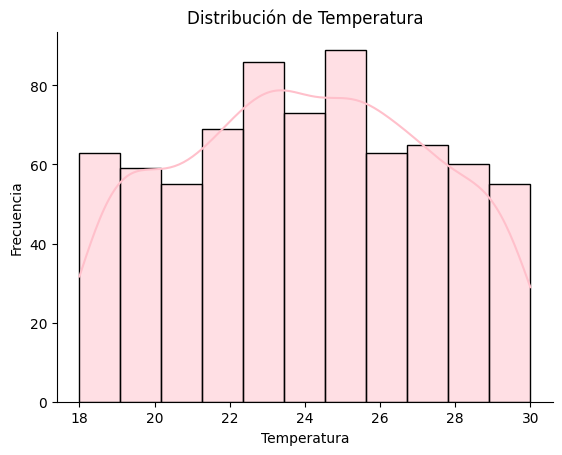

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Temperature'], kde = True, color = 'pink')

plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Distribución de Temperatura')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

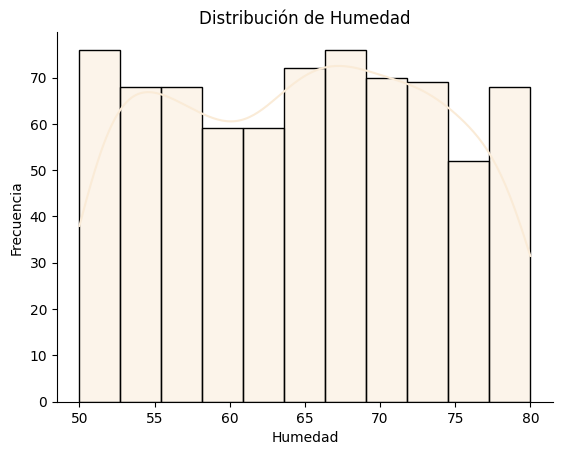

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Humidity'], kde = True, color = 'antiquewhite')

plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Humedad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

In [280]:
 df['Traffic_Status'].unique()

array(['Heavy', 'Detour', 'Clear'], dtype=object)

In [281]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'Inventory_Level ~ C(Traffic_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

# H0: NO HAY DIFERENCIA SIGNIFICATIVA ENTRE GRUPOS NO SE RECHAZA H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,1.176274e+04,5881.368036,0.447065,0.639676
Residual,734.0,9.656147e+06,13155.513551,NaN,NaN


In [282]:
df.drop(columns = ["Traffic_Status"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,Weather,83.7,272,0


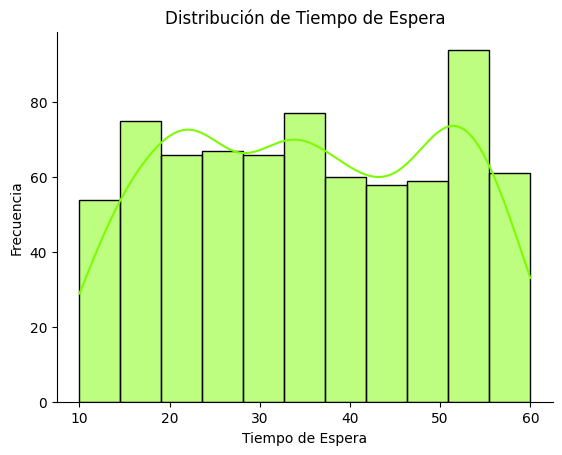

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'lawngreen')

plt.xlabel('Tiempo de Espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tiempo de Espera')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

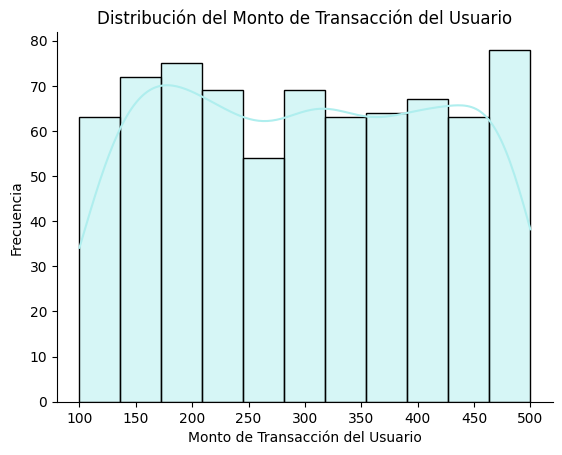

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'paleturquoise')

plt.xlabel('Monto de Transacción del Usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución del Monto de Transacción del Usuario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

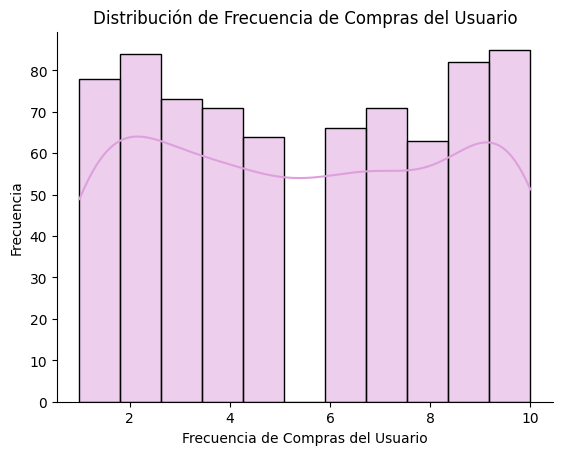

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Purchase_Frequency'], kde = True, color = 'plum')

plt.xlabel('Frecuencia de Compras del Usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencia de Compras del Usuario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

In [286]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'Inventory_Level ~ C(Logistics_Delay_Reason)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

# H0: NO HAY DIFERENCIA SIGNIFICATIVA ENTRE GRUPOS NO SE RECHAZA H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,2.457475e+04,12287.375054,0.93525,0.392955
Residual,734.0,9.643335e+06,13138.058491,NaN,NaN


In [287]:
df.drop(columns = ["Logistics_Delay_Reason"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272,0


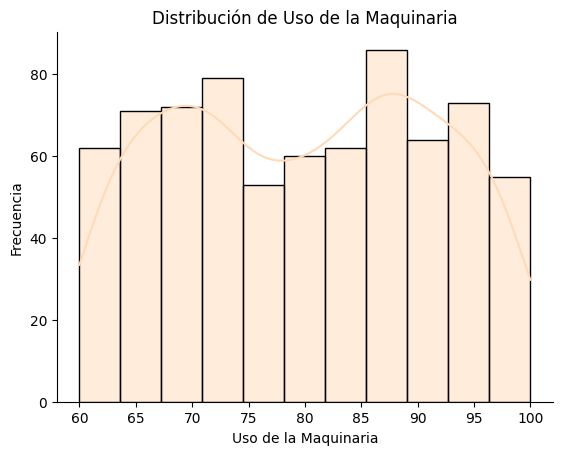

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'peachpuff')

plt.xlabel('Uso de la Maquinaria')
plt.ylabel('Frecuencia')
plt.title('Distribución de Uso de la Maquinaria')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

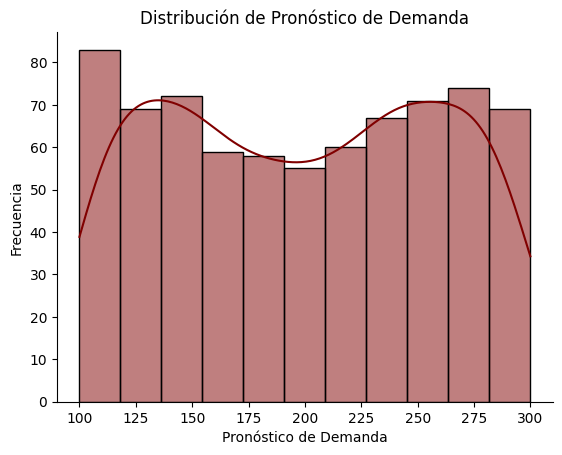

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand_Forecast'], kde = True, color = 'maroon')

plt.xlabel('Pronóstico de Demanda')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pronóstico de Demanda')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# NO HAY DATOS ATIPICOS

In [290]:
df["Logistics_Delay"].unique()

array([1, 0])

In [291]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Inventory_Level ~ C(Logistics_Delay)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Los datos no aportan

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay),1.0,2.994399e+03,2994.399298,0.227719,0.633362
Residual,735.0,9.664915e+06,13149.544603,NaN,NaN


In [292]:
df.drop(columns = ["Logistics_Delay"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238
...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272


Text(0.5, 1.0, 'Mapa de calor, Matriz de correlacion')

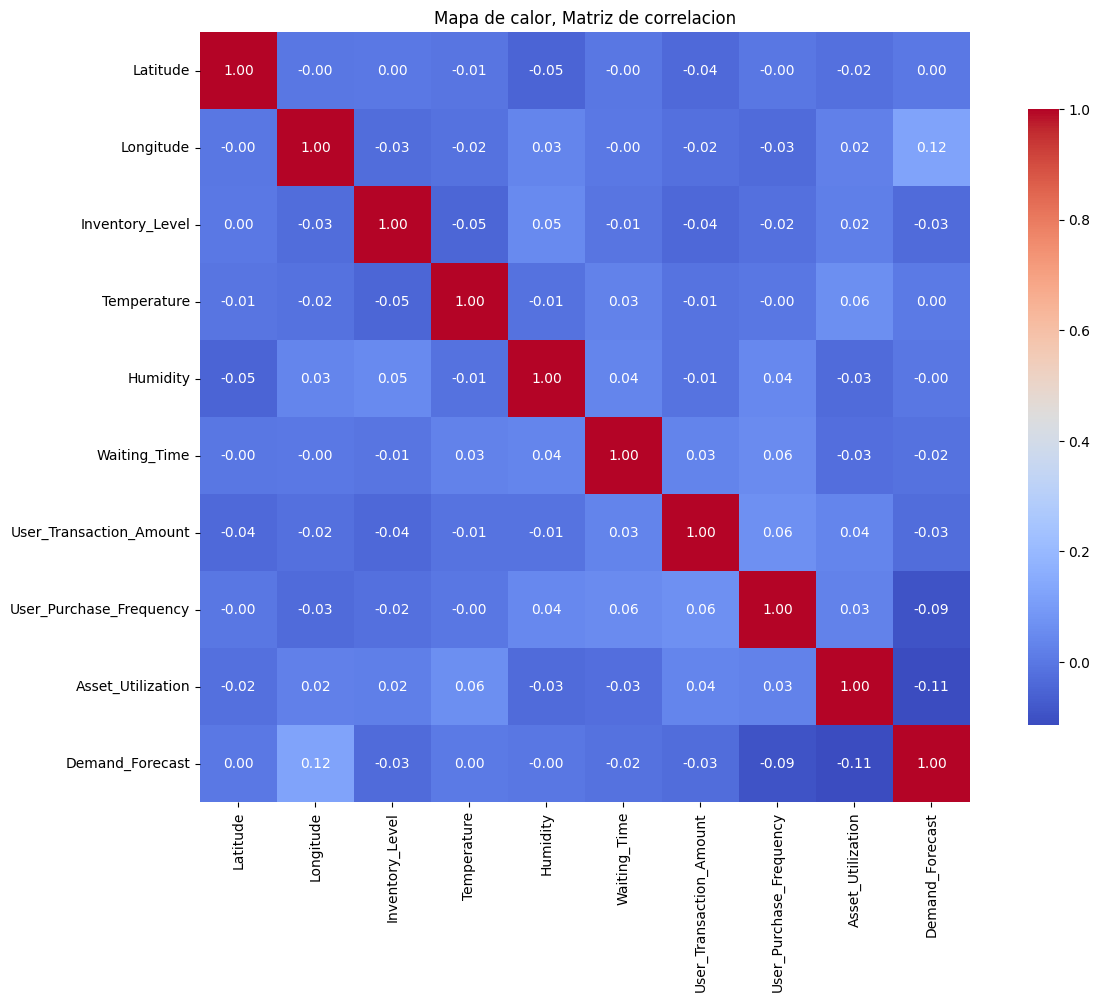

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Mapa de calor, Matriz de correlacion')

# c) Separa datos de entrenamiento y datos de prueba y entrena el modelo.

Coeficiente de determinacion: -0.0359


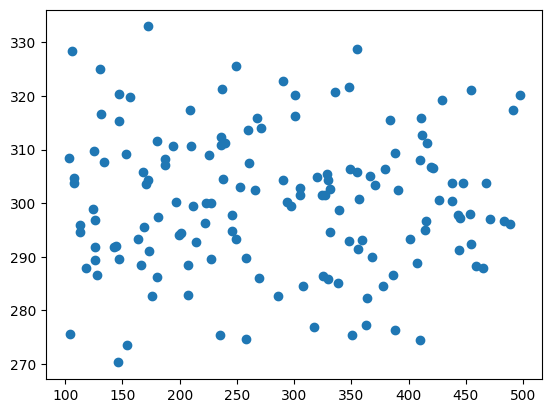

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['Latitude', 'Longitude', 'Temperature', 'Humidity', 'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Asset_Utilization', 'Demand_Forecast']]
Y = df["Inventory_Level"]

# Datos de entrenamiento y datos de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

In [295]:
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9 = modelo.params

Fun = lambda X1, X2, X3, X4, X5, X6, X7, X8, X9: b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7 + b8 * X8 + b9 * X9

Fun(9, 173,	21,	52, 24,	187,	7,	71,	17)

306.3370470001009

In [296]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'Inventory_Level ~ Latitude + Longitude + Temperature + Humidity + Waiting_Time + User_Transaction_Amount + User_Purchase_Frequency + Asset_Utilization + Demand_Forecast', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
Latitude,5.147902e+01,1.0,0.003909,0.950167
Longitude,7.626807e+03,1.0,0.579082,0.446919
Temperature,2.345276e+04,1.0,1.780701,0.182481
Humidity,2.380208e+04,1.0,1.807224,0.179261
Waiting_Time,7.317786e+01,1.0,0.005556,0.940601
User_Transaction_Amount,1.882825e+04,1.0,1.429575,0.232224
User_Purchase_Frequency,6.402171e+03,1.0,0.486099,0.485896
Asset_Utilization,5.490391e+03,1.0,0.416870,0.518707
Demand_Forecast,9.127030e+03,1.0,0.692989,0.405423
Residual,9.574969e+06,727.0,NaN,NaN


(sum_sq) → Representa la variabilidad explicada por cada variable en el modelo.

🔹 Cuanto mayor sea este valor, más contribuye la variable a explicar el resultado.
🔹 En este caso, la suma de cuadrados de los residuos es mucho mayor que la de las variables predictoras. Esto indica que la mayor parte de la variabilidad de la variable objetivo no está explicada por las variables incluidas en el modelo.

Grados de Libertad (df) → Indica cuántos valores pueden variar libremente en el cálculo.

🔹 Cada variable tiene 1 grado de libertad, porque se evalúan individualmente.
🔹 Los residuos tienen 727 grados de libertad, reflejando la cantidad de observaciones menos los parámetros estimados.
*   Un alto número de grados de libertad en los residuos sugiere que hay muchas observaciones no explicadas por las variables en el modelo.


Estadístico F (F-value) → Mide la relación entre la variabilidad explicada y la no explicada.

🔹 Valores muy bajos (ejemplo: Waiting_Time = 0.005556) sugieren que las variables predictoras no tienen un efecto fuerte sobre la variable objetivo.

Valor P (PR(>F)) → Evalúa la significancia estadística de cada variable.

🔹 Valores p altos (por ejemplo, Waiting_Time = 0.940601) indican que ninguna variable es estadísticamente significativa en la predicción del resultado.